# 수축기 혈압 EDA & Linear Regressiong Model

- sex : 1(남자), 2(여자)
- age : 20세부터 5세 단위. 
- ht : 5cm 단위 ex) 100~ 104cm = 100cm
- wt : 5kg 단위 ex ) 25 ~ 29kg = 25kg
- waist : cm 단위
- smoking : 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재 피우고 있다)
- alcohol : 0(마시지 않는다), 1(마신다)
- sbp : mmHg


## 1) 필요한 column만 추출

In [373]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글 지원
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 상관계수
from scipy import stats

# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


In [374]:
df = pd.read_csv('C:/Users/sja95/OneDrive/바탕 화면/dataset/건강검진2017.csv', encoding = 'euc-KR')

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [375]:
df = df[['성별코드','연령대코드(5세단위)','신장(5Cm단위)','체중(5Kg단위)','허리둘레','흡연상태','음주여부','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','혈색소','수축기혈압']]

In [376]:
df.columns = ['sex','age','ht','wt','waist','smoking','alcohol','tchol','tg','hdl','hgb','sbp']

In [377]:
# 결측값 제거

df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999032 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      999032 non-null  int64  
 1   age      999032 non-null  int64  
 2   ht       999032 non-null  int64  
 3   wt       999032 non-null  int64  
 4   waist    999032 non-null  float64
 5   smoking  999032 non-null  float64
 6   alcohol  999032 non-null  object 
 7   tchol    999032 non-null  float64
 8   tg       999032 non-null  float64
 9   hdl      999032 non-null  float64
 10  hgb      999032 non-null  float64
 11  sbp      999032 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 99.1+ MB


In [378]:
# 'sex' 데이터 분포

print(df.sex.value_counts())

# 남성 데이터가 조금 더 많지만 이정도면 '비슷하게 분포되어 있다고'말할 수 있을 정도.

1    530122
2    468910
Name: sex, dtype: int64


In [379]:
# 'age' 데이터 분포 

print(df.age.value_counts())

# 40-50대가 전체 데이터 중 50%를 차지. 60대, 30대가 각각 16%, 20대는 8%, 70대 이상이 약 10%정도.

9     131458
11    130253
10    119210
12    111868
13    106725
8      85292
7      78168
6      64811
14     53342
15     51161
16     25739
5      22134
17     15374
18      3497
Name: age, dtype: int64


In [380]:
# 'ht' 분포 

# 최대값, 최솟값 확인
print('최대 : ',df['ht'].max())
print('최소 : ', df['ht'].min())
print('평균 : ', df['ht'].mean())
category = pd.cut(df.ht, bins = range(130,200,10), labels = ['130~139','140~149', '150~159','160~169','170~179','180~190'])
print(category.value_counts())

# 성별은 남성이 더 많으나, 평균 신장은 162로 예상보다 조금 더 낮음. 
# 남성 40-50대 평균 신장은 40대 (172.78), 50대(169.97), 여성 40-50대 평균신장은 각각 40대(159.91), 50대(157.23)

최대 :  190
최소 :  130
평균 :  162.23019883246982
150~159    350353
160~169    347090
140~149    148309
170~179    135630
130~139     10567
180~190      6990
Name: ht, dtype: int64


In [381]:
# sex - age 분포 확인

m20 = df[(df['sex'] == 1) & ((df['age']==5) | (df['age']==6))]
m30 = df[(df['sex'] == 1) & ((df['age']==7) | (df['age']==8))]
m40 = df[(df['sex'] == 1) & ((df['age']==9) | (df['age']==10))]
m50 = df[(df['sex'] == 1) & ((df['age']==11) | (df['age']==12))]
m60 = df[(df['sex'] == 1) & ((df['age']==13) | (df['age']==14))]
m70 = df[(df['sex'] == 1) & ((df['age']==15) | (df['age']==16))]
m80 = df[(df['sex'] == 1) & ((df['age']==17) | (df['age']==18))]

f20 = df[(df['sex'] == 2) & ((df['age']==5) | (df['age']==6))]
f30 = df[(df['sex'] == 2) & ((df['age']==7) | (df['age']==8))]
f40 = df[(df['sex'] == 2) & ((df['age']==9) | (df['age']==10))]
f50 = df[(df['sex'] == 2) & ((df['age']==11) | (df['age']==12))]
f60 = df[(df['sex'] == 2) & ((df['age']==13) | (df['age']==14))]
f70 = df[(df['sex'] == 2) & ((df['age']==15) | (df['age']==16))]
f80 = df[(df['sex'] == 2) & ((df['age']==17) | (df['age']==18))]

print('20대 남성 : ', len(m20))
print('30대 남성 : ', len(m30))
print('40대 남성 : ', len(m40))
print('50대 남성 : ', len(m50))
print('60대 남성 : ', len(m60))
print('70대 남성 : ', len(m70))
print('80대 이상 남성 : ', len(m80), '\n')
print('20대 여성 : ', len(f20))
print('30대 여성 : ', len(f30))
print('40대 여성 : ', len(f40))
print('50대 여성 : ', len(f50))
print('60대 여성 : ', len(f60))
print('70대 여성 : ', len(f70))
print('80대 이상 여성 : ', len(f80))


20대 남성 :  44242
30대 남성 :  107622
40대 남성 :  134931
50대 남성 :  121638
60대 남성 :  78203
70대 남성 :  35816
80대 이상 남성 :  7670 

20대 여성 :  42703
30대 여성 :  55838
40대 여성 :  115737
50대 여성 :  120483
60대 여성 :  81864
70대 여성 :  41084
80대 이상 여성 :  11201


In [382]:
# 체중 분포 확인

print('최대 : ',df['wt'].max())
print('최소 : ', df['wt'].min())
print('평균 : ', df['wt'].mean())


category = pd.cut(df.wt, bins = range(20,150,10), 
                  labels = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129','130-140'])
print(category.value_counts())

tmp = df.loc[df['wt']<30]
tmp

최대 :  140
최소 :  25
평균 :  63.271211532763715
50-59      303776
60-69      265326
40-49      189862
70-79      149429
80-89       52319
30-39       18940
90-99       14592
100-109      3658
110-119       818
20-29         180
120-129       124
130-140         8
Name: wt, dtype: int64


,sex,age,ht,wt,waist,smoking,alcohol,tchol,tg,hdl,hgb,sbp
89545,2,18,140,25,60.0,1.0,N,199.0,98.0,32.0,9.6,120.0
320838,2,18,140,25,63.0,1.0,N,111.0,54.0,39.0,9.2,150.0
496898,2,18,130,25,70.0,1.0,N,144.0,58.0,57.0,7.8,106.0
641583,2,18,130,25,72.0,1.0,N,215.0,49.0,69.0,10.9,147.0
658809,2,18,130,25,80.0,1.0,N,184.0,137.0,31.0,10.4,120.0
717970,2,18,130,25,63.0,1.0,N,158.0,87.0,56.0,11.1,131.0
720274,2,18,140,25,68.0,2.0,N,216.0,85.0,64.0,11.9,136.0
795620,2,18,130,25,71.2,1.0,N,185.0,74.0,54.0,7.7,130.0
987745,2,18,140,25,64.0,1.0,N,137.0,107.0,36.0,8.4,139.0


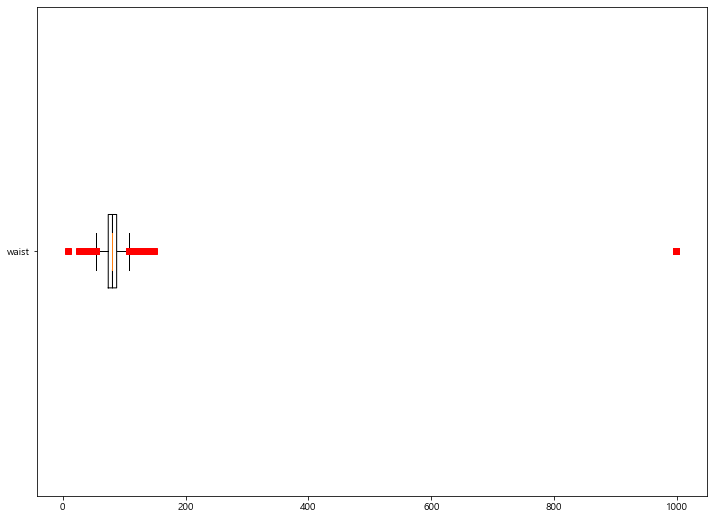

53.54999999999999 108.35


In [383]:
# waist boxplot로 분포 확인
# outlier(이상치) 확인

plt.figure(figsize = (12,9))
plt.boxplot(df['waist'], 
            notch = 1, sym = 'rs', vert = 0)
plt.yticks([1],['waist'])
plt.show()

# df.tchol.describe()

q25, q75 = np.quantile(df['waist'], 0.25), np.quantile(df['waist'], 0.75)

IQR = q75 - q25

# outlier 계산

lower = q25 - IQR*1.5
upper = q75 + IQR*1.5

print(lower, upper)

In [384]:
# 허리둘레 분포 확인

# 허리둘레 25인치가 68cm. 

print('최대 : ', df['waist'].max())
print('최소 : ', df['waist'].min())

temp = df.loc[df['waist']>108]
temp
# 남성, 키 165cm, 체중 70kg인데 허리둘레가 35cm...? 데이터에 문제가 있어 보인다. 
# 관련 자료를 찾아보니 기네스에 등록된 제일 얇은 사람의 허리가 13인치, 약 33cm.... 

최대 :  999.0
최소 :  8.0


,sex,age,ht,wt,waist,smoking,alcohol,tchol,tg,hdl,hgb,sbp
90,1,15,165,75,110.0,2.0,Y,217.0,184.0,40.0,17.0,183.0
102,2,12,155,85,109.0,1.0,N,203.0,105.0,46.0,14.3,120.0
134,1,6,185,120,110.0,1.0,Y,264.0,120.0,57.0,15.3,140.0
297,1,6,175,105,114.0,1.0,Y,224.0,135.0,57.0,16.3,125.0
455,1,6,185,100,110.8,1.0,Y,248.0,94.0,55.0,15.7,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...
998128,1,14,165,90,110.0,3.0,N,129.0,179.0,35.0,13.4,135.0
998526,2,12,155,80,112.0,1.0,Y,208.0,160.0,62.0,15.1,138.0
998609,1,7,175,90,110.1,3.0,Y,138.0,156.0,46.0,14.8,120.0
999499,1,10,175,110,115.0,3.0,Y,191.0,110.0,45.0,15.2,147.0


In [385]:
# 따라서 허리둘레가 50cm 이하는 이상값으로 간주하고 제거, 
# 허리둘레가 999cm 인 데이터 또한 이상값으로 간주하고 제거.

df.drop(df.loc[(df['waist']==999)|(df['waist']<=53.0)].index, inplace = True)

print('최대 : ', df['waist'].max())
print('최소 : ', df['waist'].min())
print('평균 : ', df['waist'].mean())

category = pd.cut(df.waist, bins = range(50,151,10), 
                  labels = ['50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129','130-139','140-150'])
print(category.value_counts())

최대 :  149.1
최소 :  53.1
평균 :  81.18394882382287
80-89      369387
70-79      325621
90-99      137852
60-69      132854
100-109     22144
50-59        8420
110-119      2343
120-129       185
130-139        16
140-150         2
Name: waist, dtype: int64


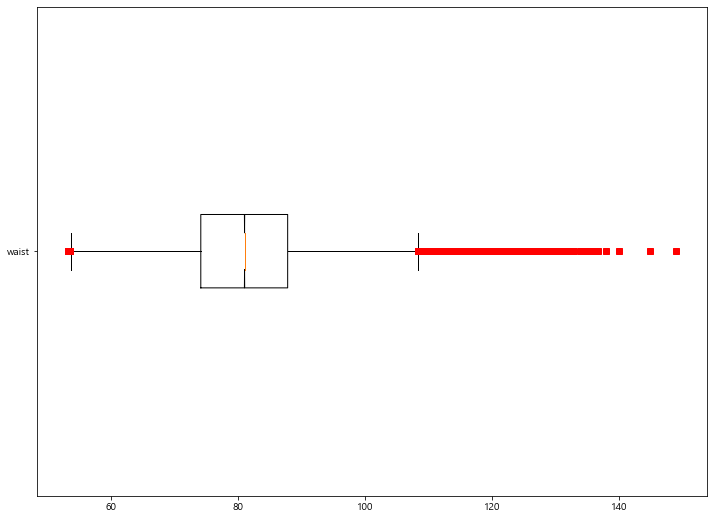

count    998824.000000
mean         81.183949
std           9.590009
min          53.100000
25%          74.100000
50%          81.000000
75%          87.800000
max         149.100000
Name: waist, dtype: float64

In [386]:
# waist boxplot로 분포 확인 이상치 제거 후


plt.figure(figsize = (12,9))
plt.boxplot(df['waist'], 
            notch = 1, sym = 'rs', vert = 0)
plt.yticks([1],['waist'])
plt.show()

df.waist.describe()



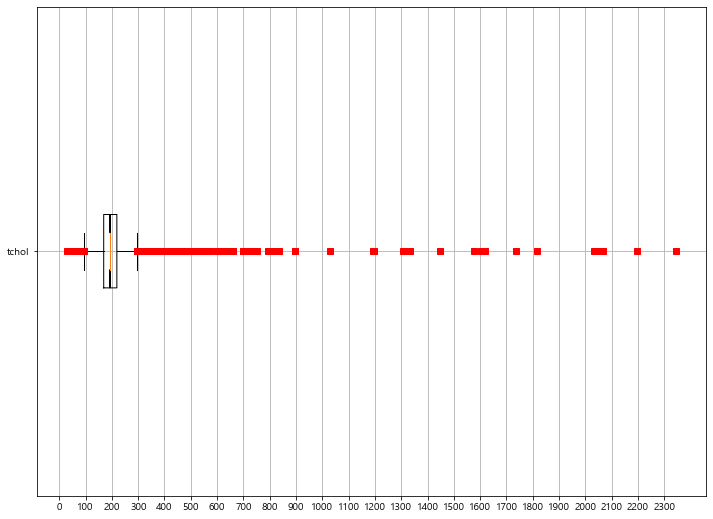

최대 :  2344.0
최소 :  30.0
평균 :  195.54581788182904
19.0 369.0


In [387]:
# tchol boxplot로 분포 확인
# outlier(이상치) 확인

plt.figure(figsize = (12,9))
plt.boxplot(df['tchol'], 
            notch = 1, sym = 'rs', vert = 0)
plt.xticks(range(0, 2400, 100))
plt.yticks([1],['tchol'])
plt.grid()
plt.show()

print('최대 : ',df['tchol'].max())
print('최소 : ', df['tchol'].min())
print('평균 : ', df['tchol'].mean())

# df.tchol.describe()

q25, q75 = np.quantile(df['tchol'], 0.25), np.quantile(df['tchol'], 0.75)

IQR = q75 - q25

# outlier 계산

lower = q25 - IQR*3
upper = q75 + IQR*3

print(lower, upper)

In [388]:
# 총 콜레스테롤 데이터 분포

temp = df.loc[df['tchol']>690]
temp

# boxplot을 참고해서 수치가 690 이상을 이상치로 판단

df.drop(df.loc[df['tchol']>=690].index, inplace = True)

print('최대 : ',df['tchol'].max())
print('최소 : ', df['tchol'].min())
print('평균 : ', df['tchol'].mean())

최대 :  662.0
최소 :  30.0
평균 :  195.5137816206345


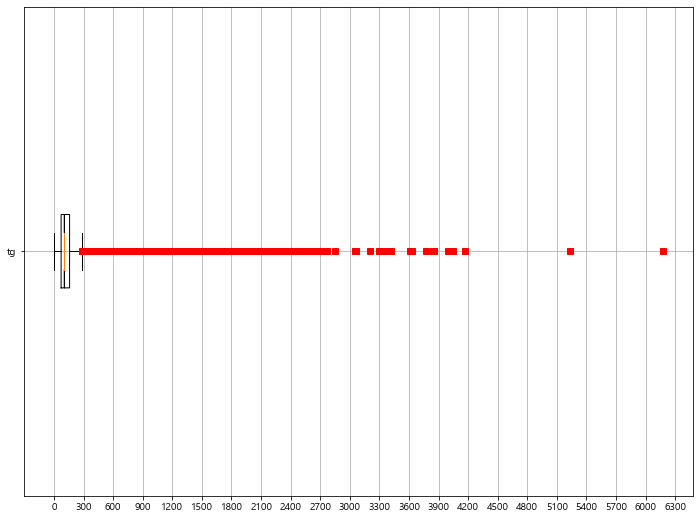

count    998794.000000
mean        132.644085
std         103.190196
min           1.000000
25%          73.000000
50%         106.000000
75%         159.000000
max        6173.000000
Name: tg, dtype: float64
-56.0 288.0


In [389]:
# tg boxplot로 분포 확인
# outlier(이상치) 확인

plt.figure(figsize = (12,9))
plt.boxplot(df['tg'], 
            notch = 1, sym = 'rs', vert = 0)
plt.xticks(range(0, 6500, 300))
plt.yticks([1],['tg'])
plt.grid()
plt.show()

print(df.tg.describe())

q25, q75 = np.quantile(df['tg'], 0.25), np.quantile(df['tg'], 0.75)

IQR = q75 - q25

# outlier 계산

lower = q25 - IQR*1.5
upper = q75 + IQR*1.5

print(lower, upper)

In [390]:
# 트리글리세라이드 데이터 분포

print('최대 : ',df['tg'].max())
print('최소 : ', df['tg'].min())
print('평균 : ', df['tg'].mean())

tmp = df.loc[df['tg']>700]
tmp['sbp'].mean()

최대 :  6173.0
최소 :  1.0
평균 :  132.64408476622808


130.00623214749416

In [391]:
# boxplot 기준으로 이상값을 2800으로 지정함. 

df.drop(df.loc[df['tg']>=2800].index, inplace = True)

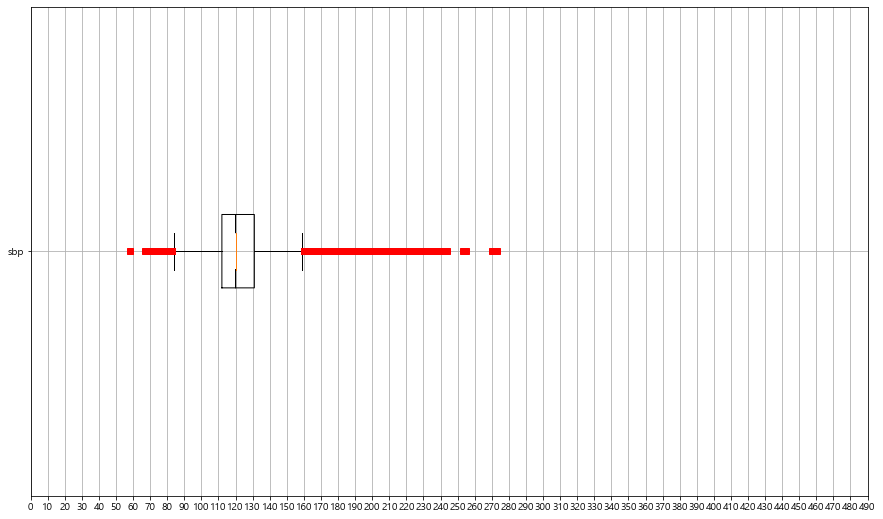

count    998774.000000
mean        122.433711
std          14.555416
min          58.000000
25%         112.000000
50%         120.000000
75%         131.000000
max         273.000000
Name: sbp, dtype: float64
83.5 159.5


In [392]:
# sbp boxplot

plt.figure(figsize = (15,9))
plt.boxplot(df['sbp'], 
            notch = 1, sym = 'rs', vert = 0)
plt.xticks(range(0, 500, 10))
plt.yticks([1],['sbp'])
plt.grid()
plt.show()

print(df.sbp.describe())

q25, q75 = np.quantile(df['sbp'], 0.25), np.quantile(df['sbp'], 0.75)

IQR = q75 - q25

# outlier 계산

lower = q25 - IQR*1.5
upper = q75 + IQR*1.5

print(lower, upper)

In [393]:
# sbp 데이터 분포

# 수축기 혈압이 60이하이거나, 250 이상을 이상값으로 판단.

df.drop(df.loc[df['sbp']<=60].index, inplace = True)
df.drop(df.loc[df['sbp']>=250].index, inplace = True)

print('최대 : ', df['sbp'].max())
print('최소 : ', df['sbp'].min())
print('평균 : ', df['sbp'].mean())

최대 :  244.0
최소 :  67.0
평균 :  122.43321328555452


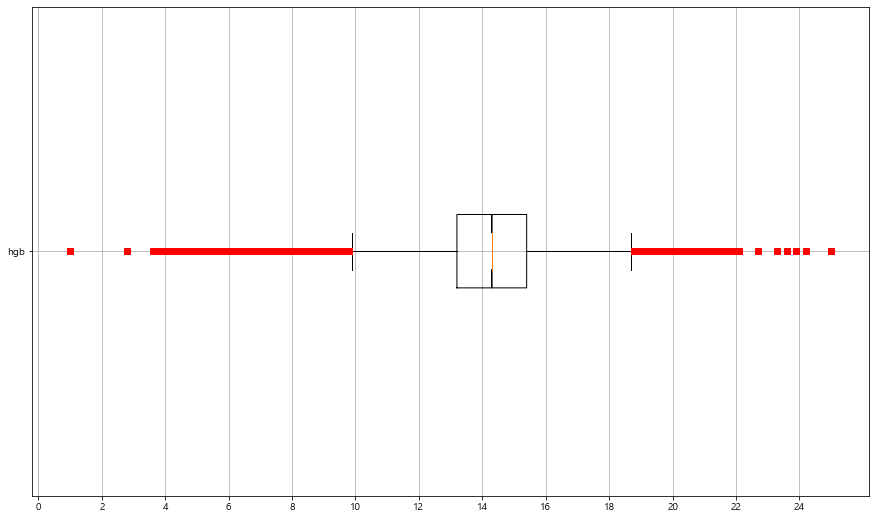

count    998769.000000
mean         14.227022
std           1.587076
min           1.000000
25%          13.200000
50%          14.300000
75%          15.400000
max          25.000000
Name: hgb, dtype: float64
9.899999999999999 18.700000000000003


In [394]:
# hgb 데이터 분포

plt.figure(figsize = (15,9))
plt.boxplot(df['hgb'], 
            notch = 1, sym = 'rs', vert = 0)
plt.xticks(range(0, 25, 2))
plt.yticks([1],['hgb'])
plt.grid()
plt.show()

print(df.hgb.describe())

q25, q75 = np.quantile(df['hgb'], 0.25), np.quantile(df['hgb'], 0.75)

IQR = q75 - q25

# outlier 계산

lower = q25 - IQR*1.5
upper = q75 + IQR*1.5

print(lower, upper)

In [395]:
# 헤모글로빈이 4이하, 22이상을 이상값으로 판단하고 제거

df.drop(df.loc[df['hgb']<=4].index, inplace = True)
df.drop(df.loc[df['hgb']>=22].index, inplace = True)


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998744 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      998744 non-null  int64  
 1   age      998744 non-null  int64  
 2   ht       998744 non-null  int64  
 3   wt       998744 non-null  int64  
 4   waist    998744 non-null  float64
 5   smoking  998744 non-null  float64
 6   alcohol  998744 non-null  object 
 7   tchol    998744 non-null  float64
 8   tg       998744 non-null  float64
 9   hdl      998744 non-null  float64
 10  hgb      998744 non-null  float64
 11  sbp      998744 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 99.1+ MB


In [397]:
# 음주여부 column 값을 y -> 1, N -> 0 변환

df.loc[(df.alcohol=='Y'),'alcohol'] = 1.0
df.loc[(df.alcohol=='N'), 'alcohol'] = 0.0

In [398]:
df.head()

,sex,age,ht,wt,waist,smoking,alcohol,tchol,tg,hdl,hgb,sbp
0,1,8,170,75,90.0,1.0,1.0,193.0,92.0,48.0,17.1,120.0
1,1,7,180,80,89.0,3.0,0.0,228.0,121.0,55.0,15.8,130.0
2,1,9,165,75,91.0,1.0,0.0,136.0,104.0,41.0,15.8,120.0
3,1,11,175,80,91.0,1.0,0.0,201.0,106.0,76.0,17.6,145.0
4,1,11,165,60,80.0,1.0,0.0,199.0,104.0,61.0,13.8,138.0


## 2) BMI column 추가 - 체중(단위:kg) / (신장(단위:m))^2

In [399]:
df['bmi'] = df['wt'] / ((df['ht']/100)**2)
df = df.round(decimals=2)

In [400]:
# 타입을 float형으로 바꾸기

df = df.astype(float)

In [401]:
# y인 수축기혈압을 맨 오른쪽으로 이동 ( 컬럼 위치 바꾸기)

df = df[['sex','age','ht','wt','bmi','waist','smoking','alcohol','tchol','tg','hdl','hgb','sbp']]

## 3) EDA

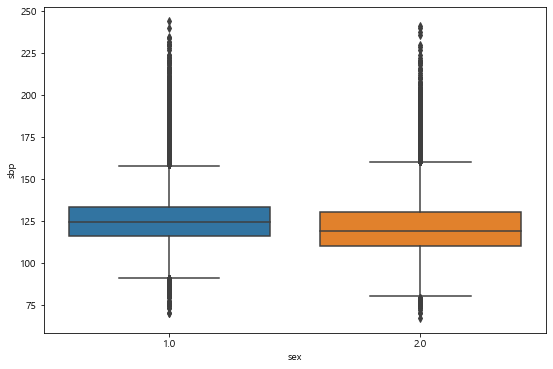

In [402]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'sex',y = 'sbp', data = df)
plt.show()

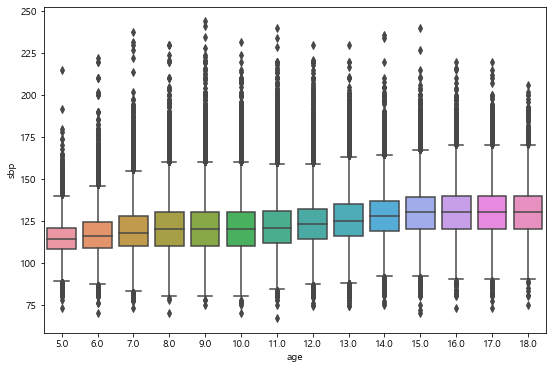

In [403]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'age',y = 'sbp', data = df)
plt.show()

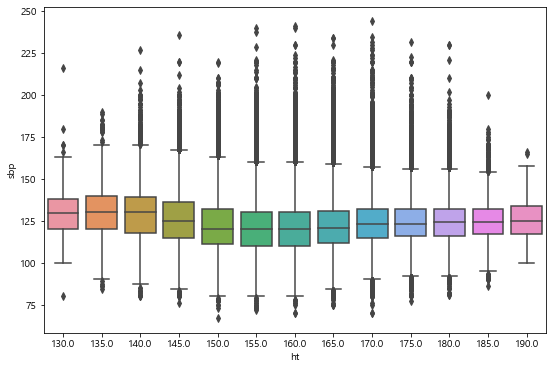

In [404]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'ht',y = 'sbp', data = df)
plt.show()

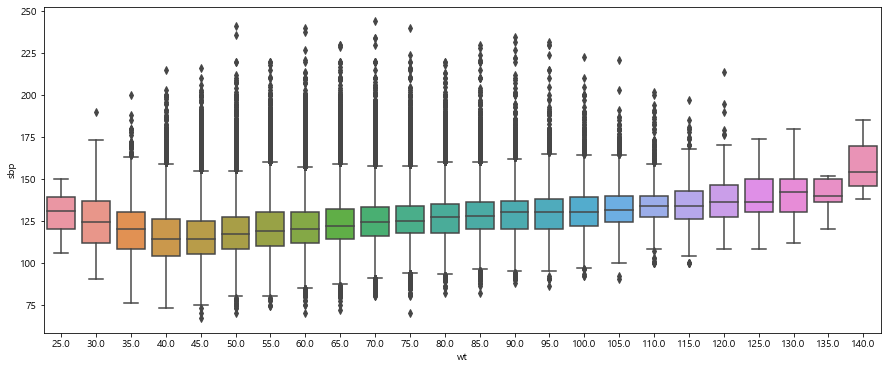

In [405]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'wt',y = 'sbp', data = df)
plt.show()

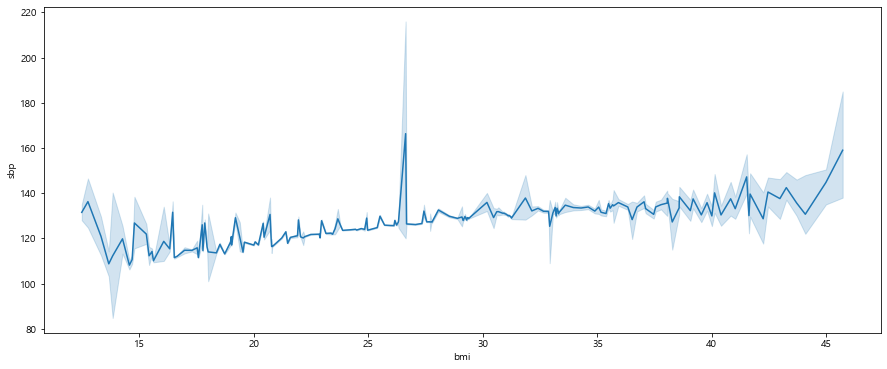

In [406]:
plt.figure(figsize = (15,6))
sns.lineplot(x = df.bmi, y = df.sbp)
plt.show()

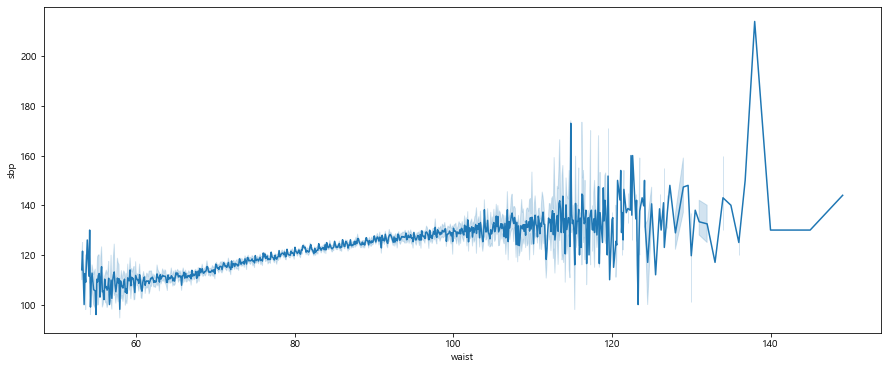

In [407]:
plt.figure(figsize = (15,6))
sns.lineplot(x = df.waist, y = df.sbp)
plt.show()

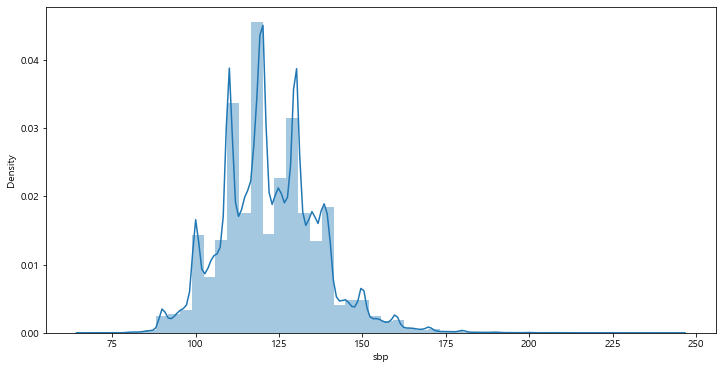

In [408]:
plt.figure(figsize = (12,6))
sns.distplot(df.sbp, hist = True, kde = True)
plt.show()

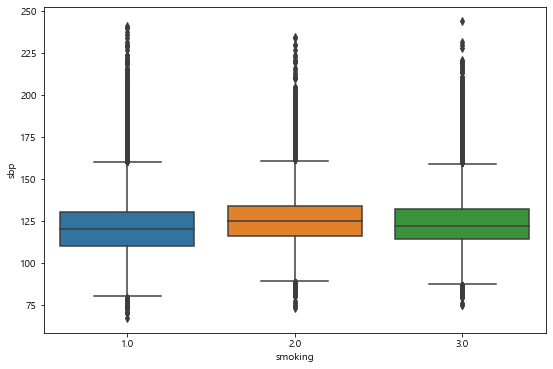

In [409]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'smoking',y = 'sbp', data = df)
plt.show()

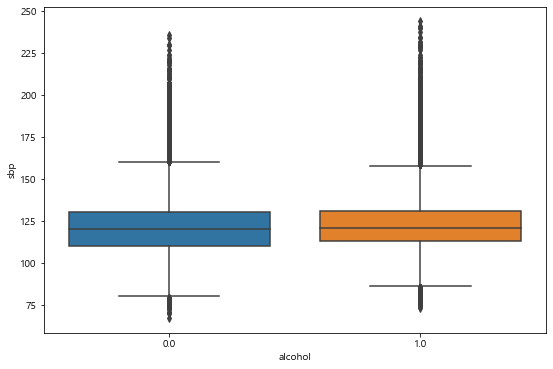

In [410]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'alcohol',y = 'sbp', data = df)
plt.show()

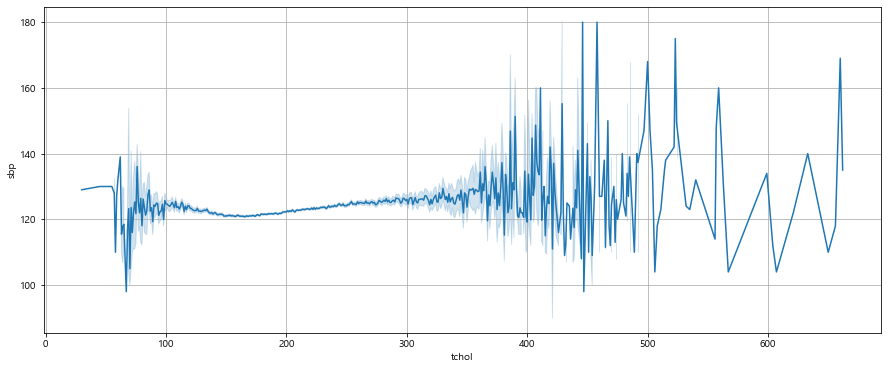

In [411]:
plt.figure(figsize = (15,6))
sns.lineplot(x = df.tchol, y = df.sbp)
plt.grid()
plt.show()

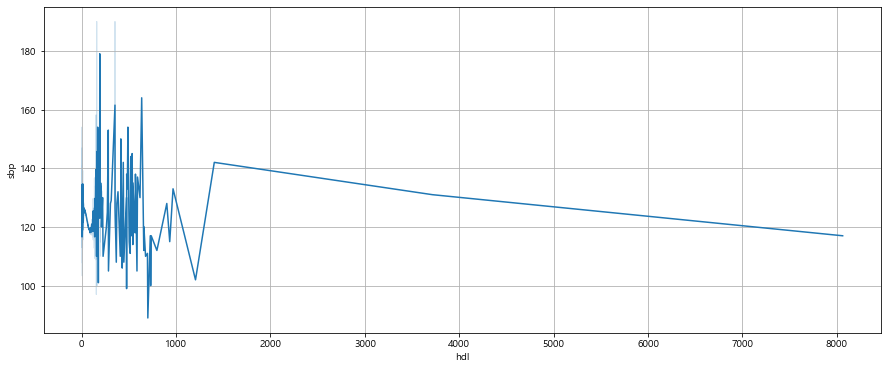

In [412]:
# hdl 

plt.figure(figsize = (15,6))
sns.lineplot(x = df.hdl, y = df.sbp)
plt.grid()
plt.show()

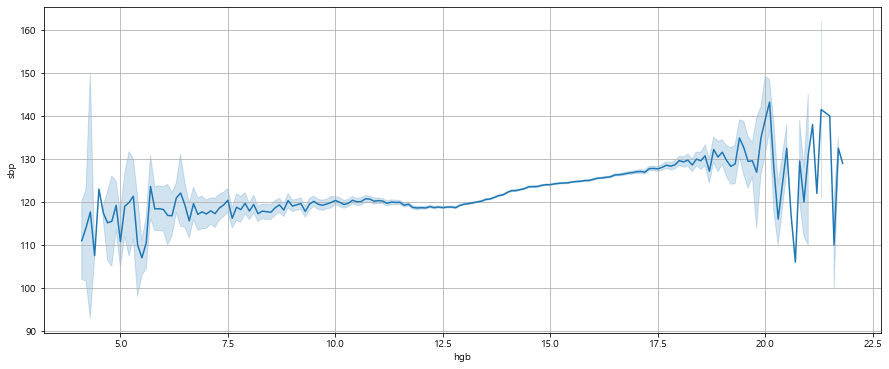

In [413]:
# hgb

plt.figure(figsize = (15,6))
sns.lineplot(x = df.hgb, y = df.sbp)
plt.grid()
plt.show()

In [414]:
# age - waist 

df['ageWaist'] = df['age'] * df['waist']

# 상관계수

print('나이*허리둘레 - 혈압 : ', stats.pearsonr(df.ageWaist, df.sbp)[0])

df.drop('ageWaist', axis = 1, inplace = True)

나이*허리둘레 - 혈압 :  0.3496582681447667


In [415]:
# bmi - waist

df['bmiWaist'] = df['bmi'] * df['waist']

# 상관계수

print('bmi*허리둘레 - 혈압 : ', stats.pearsonr(df.bmiWaist, df.sbp)[0])

df.drop('bmiWaist', axis=1, inplace = True)

bmi*허리둘레 - 혈압 :  0.33409037806402


In [416]:
# 상관계수

print('성별 - 혈압 : ', stats.pearsonr(df.sex, df.sbp)[0])
print('연령 - 혈압 : ', stats.pearsonr(df.age, df.sbp)[0])
print('키 - 혈압 : ', stats.pearsonr(df.ht, df.sbp)[0])
print('몸무게 - 혈압 : ', stats.pearsonr(df.wt, df.sbp)[0])
print('BMI - 혈압 : ', stats.pearsonr(df.bmi, df.sbp)[0])
print('허리둘레 - 혈압 : ', stats.pearsonr(df.waist, df.sbp)[0])
print('총콜레스테롤 - 혈압 : ', stats.pearsonr(df.tchol, df.sbp)[0])
print('중성지방 - 혈압 : ', stats.pearsonr(df.tg, df.sbp)[0])
print('HDL콜레스테롤 - 혈압 : ', stats.pearsonr(df.hdl, df.sbp)[0])
print('헤모글로빈 - 혈압 : ', stats.pearsonr(df.hgb, df.sbp)[0])
print('흡연상태 - 혈압 : ', stats.pearsonr(df.smoking, df.sbp)[0])
print('음주여부 - 혈압 : ', stats.pearsonr(df.alcohol, df.sbp)[0])

성별 - 혈압 :  -0.17669895730827154
연령 - 혈압 :  0.265590529753278
키 - 혈압 :  0.03506924655138421
몸무게 - 혈압 :  0.2507370967393384
BMI - 혈압 :  0.30949331265490776
허리둘레 - 혈압 :  0.34260648257771353
총콜레스테롤 - 혈압 :  0.06981247865113949
중성지방 - 혈압 :  0.18926352533970203
HDL콜레스테롤 - 혈압 :  -0.10801172418579091
헤모글로빈 - 혈압 :  0.1664514010149485
흡연상태 - 혈압 :  0.08520929725812176
음주여부 - 혈압 :  0.033166902255819544


# 2. Model Create


In [417]:
X = df[['sex','age','ht','wt','bmi','waist','smoking','alcohol']]
y = df['sbp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((699120, 8), (299624, 8), (699120,), (299624,))

In [418]:
RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression()

In [419]:
y_hat = RA.predict(X_test)

In [420]:
mse = mean_squared_error(y_test, y_hat)
np.sqrt(mse)

13.156058314389492

In [421]:
# 모델의 결정계수
# 결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명

print(RA.score(X_test, y_test))

0.18332309238276712


In [422]:
X = df[['sex','age','ht','wt','bmi','waist','smoking','alcohol','tchol','tg', 'hdl','hgb']]
y = df['sbp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

RA = LinearRegression()
RA.fit(X_train, y_train)
y_hat = RA.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
print('mse : ', np.sqrt(mse))
print('RA: ',RA.score(X_test, y_test))

mse :  13.072966836157518
RA:  0.1936065066294821
